In [1]:
from couchbase.auth import PasswordAuthenticator
from couchbase.options import ClusterOptions
from couchbase.cluster import Cluster
from couchbase.management.buckets import BucketSettings, BucketType

In [2]:
import numpy as np
import pandas as pd

In [3]:
#created couchbase database (new database which has not been thought in class and it is NoSQL database)
#Installed apache nifi ETL tool and used it to extract transaction excel files from different folder to here and automated the process
#Data Source for this Project:
#1.Excel files for transaction data
#2. CounchBase and Apache Nifi for cahier data storage and extract.

In [4]:
from getpass import getpass
username = input("Enter your Couchbase username: ")
password = getpass("Enter your Couchbase password: ")
cluster = Cluster('couchbase://localhost', ClusterOptions(
    PasswordAuthenticator(username, password)))

Enter your Couchbase username:  Administrator
Enter your Couchbase password:  ········


In [5]:
#importing operator logs
couch_df1 = pd.read_csv("POS_operator_logs_20171207-20171219.csv")
couch_df2 = pd.read_csv("POS_operator_logs_20190213-20190226.csv")
couch_df3 =pd.read_csv("POS_operator_logs_20190328-20190410.csv")

In [6]:
#cleaning the three files before laoding into Couchbase
couch_df1.head()

,WorkstationGroupID,WorkstationID,TranID,BeginDateTime,OperatorID,Items
0,8,16,1712071060162,2017-12-07T06:04:01,266,OperatorSignOn
1,8,15,1712071060152,2017-12-07T06:04:15,265,OperatorSignOn
2,8,14,1712071060142,2017-12-07T06:05:36,264,OperatorSignOn
3,8,18,1712071060182,2017-12-07T06:05:41,268,OperatorSignOn
4,8,17,1712071060172,2017-12-07T06:05:56,267,OperatorSignOn


In [7]:
couch_df1['BeginDateTime'] = pd.to_datetime(couch_df1['BeginDateTime']).dt.strftime('%Y-%m-%dT%H:%M:%S')

In [8]:
couch_df2.head()

,WorkstationGroupID,WorkstationID,TranID,BeginDateTime,OperatorID,Items
0,8,19,1902131060192,2019-02-13T05:37:55,269,OperatorSignOn
1,8,18,1902131060182,2019-02-13T05:37:55,268,OperatorSignOn
2,8,17,1902131060172,2019-02-13T05:38:43,267,OperatorSignOn
3,1,4,190213106042,2019-02-13T07:01:26,332,OperatorSignOn
4,1,7,190213106072,2019-02-13T07:01:57,10,OperatorSignOn


In [9]:
couch_df2['BeginDateTime'] = pd.to_datetime(couch_df2['BeginDateTime']).dt.strftime('%Y-%m-%dT%H:%M:%S')


In [10]:
couch_df3.head()

,WorkstationGroupID,WorkstationID,TranID,BeginDateTime,OperatorID,Items
0,8,19,1903281060192,2019-03-28T06:08:13,269,OperatorSignOn
1,8,18,1903281060182,2019-03-28T06:09:13,268,OperatorSignOn
2,8,17,1903281060172,2019-03-28T06:08:33,267,OperatorSignOn
3,1,4,190328106042,2019-03-28T07:04:45,104,OperatorSignOn
4,1,6,190328106062,2019-03-28T07:18:38,125,OperatorSignOn


In [11]:
couch_df3['BeginDateTime'] = pd.to_datetime(couch_df3['BeginDateTime']).dt.strftime('%Y-%m-%dT%H:%M:%S')


In [12]:
len(couch_df1)

4708

In [13]:
len(couch_df2)

5218

In [14]:
len(couch_df3)

4178

In [15]:
#converting to JSON format and adding it to couchbase to make it as one of the source for the data for our project
json_data1 = couch_df1.to_json(orient='records')
json_data2 = couch_df2.to_json(orient='records')
json_data3 = couch_df3.to_json(orient='records')

In [16]:
# Open a Couchbase bucket-- basket is the database in Couchbase
bucket = cluster.bucket('Source_DB')
collection = bucket.default_collection()

In [17]:
bucket = cluster.bucket('Source_DB')
collection = bucket.default_collection()

document_id = '1111'  # Choose a unique ID for our document
collection.upsert(document_id, json_data1)

document_id = '2222'  # Choose a unique ID for 2nd document
collection.upsert(document_id, json_data2)

document_id = '3333'  # Choose a unique ID for 3rd document
collection.upsert(document_id, json_data3)

MutationResult:result:{err=0, err_string=Undefined error: 0, value={'cas': 1700706304033292288, 'key': '3333', 'mutation_token': <pycbc_core.mutation_token object at 0x124410af0>}}

In [18]:
from couchbase.cluster import QueryOptions

# Defining a function to count documents in the collection
def count_documents(collection_name):
    query = f"SELECT COUNT(*) AS count FROM `{collection_name}`;"
    result = cluster.query(query)
    for row in result:
        return row['count']

In [19]:
# Replace 'your_collection_name' with the actual name of your Couchbase collection
print("Total documents in collection:", count_documents('Source_DB'))

Total documents in collection: 3


In [20]:
# Retrieve the document
document_id = '1111'
result = collection.get(document_id)

# The document's content is in result.value
final_json_data1 = result.value

# Assuming the JSON data is a list of records, convert it to DataFrame
df1 = pd.read_json(final_json_data1, orient='records')


In [21]:
# Retrieve the document
document_id = '2222'
result = collection.get(document_id)

# The document's content is in result.value
final_json_data2 = result.value

# Assuming the JSON data is a list of records, convert it to DataFrame
df2 = pd.read_json(final_json_data2, orient='records')


In [22]:
# Retrieve the document
document_id = '3333'
result = collection.get(document_id)

# The document's content is in result.value
final_json_data3 = result.value

# Assuming the JSON data is a list of records, convert it to DataFrame
df3 = pd.read_json(final_json_data3, orient='records')


In [23]:
df1.head()

,WorkstationGroupID,WorkstationID,TranID,BeginDateTime,OperatorID,Items
0,8,16,1712071060162,2017-12-07T06:04:01,266,OperatorSignOn
1,8,15,1712071060152,2017-12-07T06:04:15,265,OperatorSignOn
2,8,14,1712071060142,2017-12-07T06:05:36,264,OperatorSignOn
3,8,18,1712071060182,2017-12-07T06:05:41,268,OperatorSignOn
4,8,17,1712071060172,2017-12-07T06:05:56,267,OperatorSignOn


In [24]:
# Convert BeginDateTime to pandas datetime type- for dataframe1
df1['BeginDateTime'] = pd.to_datetime(df1['BeginDateTime'])

In [50]:
# Convert BeginDateTime to pandas datetime type- for dataframe2
df2['BeginDateTime'] = pd.to_datetime(df2['BeginDateTime'])

In [51]:
# Convert BeginDateTime to pandas datetime type- for dataframe3
df3['BeginDateTime'] = pd.to_datetime(df3['BeginDateTime'])

In [52]:
df1.head()

,WorkstationGroupID,WorkstationID,TranID,BeginDateTime,OperatorID,Items
0,8,16,1712071060162,2017-12-07 06:04:01,266,OperatorSignOn
1,8,15,1712071060152,2017-12-07 06:04:15,265,OperatorSignOn
2,8,14,1712071060142,2017-12-07 06:05:36,264,OperatorSignOn
3,8,18,1712071060182,2017-12-07 06:05:41,268,OperatorSignOn
4,8,17,1712071060172,2017-12-07 06:05:56,267,OperatorSignOn


In [53]:
print(df1['BeginDateTime'].dtypes)

datetime64[ns]


In [54]:
# Check for null values-dataframe 1
null_values = df1.isnull().sum()
print("Null Values:\n", null_values)

Null Values:
 WorkstationGroupID    0
WorkstationID         0
TranID                0
BeginDateTime         0
OperatorID            0
Items                 0
dtype: int64


In [55]:
# Check for duplicate rows
duplicate_rows = df1[df1.duplicated()]

print("\nDuplicate Rows:\n", duplicate_rows)


Duplicate Rows:
 Empty DataFrame
Columns: [WorkstationGroupID, WorkstationID, TranID, BeginDateTime, OperatorID, Items]
Index: []


In [56]:
# Checking if there are any duplicated TranID values in the DataFrame
duplicated_tranids = df1[df1['TranID'].duplicated(keep=False)]

# Printing the duplicated TranIDs if any exist
if not duplicated_tranids.empty:
    print("Duplicated TranIDs found:", duplicated_tranids['TranID'].unique())
else:
    print("TranID is unique across the DataFrame.")

TranID is unique across the DataFrame.


In [57]:
# Checking for null values
null_values = df2.isnull().sum()
print("Null Values:\n", null_values)

Null Values:
 WorkstationGroupID    0
WorkstationID         0
TranID                0
BeginDateTime         0
OperatorID            0
Items                 0
dtype: int64


In [58]:
print(df2['BeginDateTime'].dtypes)

datetime64[ns]


In [59]:
# Checking for duplicate rows
duplicate_rows = df2[df2.duplicated()]

print("\nDuplicate Rows:\n", duplicate_rows)


Duplicate Rows:
 Empty DataFrame
Columns: [WorkstationGroupID, WorkstationID, TranID, BeginDateTime, OperatorID, Items]
Index: []


In [60]:
# Checking if there are any duplicated TranID values in the DataFrame
duplicated_tranids = df2[df2['TranID'].duplicated(keep=False)]

# Printing the duplicated TranIDs if any exist
if not duplicated_tranids.empty:
    print("Duplicated TranIDs found:", duplicated_tranids['TranID'].unique())
else:
    print("TranID is unique across the DataFrame.")

Duplicated TranIDs found: [  1902151060114   1902151060116    190218106084   1902211060216
   1902221060114   1902251060212 190226106022155]


In [61]:
# Fetching all rows with duplicated TranID values
duplicated_rows = df2[df2['TranID'].duplicated(keep=False)]

# Printing the duplicated rows to verify
print(duplicated_rows)

      WorkstationGroupID  WorkstationID           TranID       BeginDateTime  \
723                    1              1    1902151060114 2019-02-15 00:29:38   
742                    1              1    1902151060116 2019-02-15 03:39:08   
772                    1             11    1902151060114 2019-02-15 04:07:16   
773                    1             11    1902151060116 2019-02-15 04:08:29   
1604                   1              8     190218106084 2019-02-18 08:47:15   
1832                   1              8     190218106084 2019-02-18 19:21:06   
2874                   1              2    1902211060216 2019-02-21 09:13:41   
3145                   1             21    1902211060216 2019-02-21 16:04:16   
3465                   1              1    1902221060114 2019-02-22 11:53:12   
3489                   1             11    1902221060114 2019-02-22 12:28:28   
4309                   1             21    1902251060212 2019-02-25 08:02:02   
4495                   1              2 

In [62]:
# Finding duplicates based on 'TranID' and 'BeginDateTime'
duplicated_rows = df2[df2.duplicated(subset=['TranID', 'BeginDateTime'], keep=False)]

# Printing the duplicated rows
print(duplicated_rows)

Empty DataFrame
Columns: [WorkstationGroupID, WorkstationID, TranID, BeginDateTime, OperatorID, Items]
Index: []


In [63]:
print(df3['BeginDateTime'].dtypes)

datetime64[ns]


In [64]:
# Checking for null values
null_values = df3.isnull().sum()
print("Null Values:\n", null_values)

Null Values:
 WorkstationGroupID    0
WorkstationID         0
TranID                0
BeginDateTime         0
OperatorID            0
Items                 0
dtype: int64


In [65]:
# Checking for duplicate rows
duplicate_rows = df3[df3.duplicated()]

print("\nDuplicate Rows:\n", duplicate_rows)


Duplicate Rows:
 Empty DataFrame
Columns: [WorkstationGroupID, WorkstationID, TranID, BeginDateTime, OperatorID, Items]
Index: []


In [66]:
# Checking if there are any duplicated TranID values in the DataFrame
duplicated_tranids = df3[df3['TranID'].duplicated(keep=False)]

# Printing the duplicated TranIDs if any exist
if not duplicated_tranids.empty:
    print("Duplicated TranIDs found:", duplicated_tranids['TranID'].unique())
else:
    print("TranID is unique across the DataFrame.")

Duplicated TranIDs found: [ 1903291060112  1903291060114  1903301060192 19033010602310
  1903301060119 19033010601110 19033010602312 19033010602314
  1903311060132 19033110602247 19033110602257 19033110602259
  1904011060228  1904011060138  1904011060112  1904011060114
  1904041060238  1904061060124 19040810606200  1904091060172
  1904101060182  1904101060172  1904101060122]


In [67]:
# Finding duplicates based on 'TranID' and 'BeginDateTime'
duplicated_rows = df3[df3.duplicated(subset=['TranID', 'BeginDateTime'], keep=False)]

# Print the duplicated rows
print(duplicated_rows)

Empty DataFrame
Columns: [WorkstationGroupID, WorkstationID, TranID, BeginDateTime, OperatorID, Items]
Index: []


In [68]:
#checked operators data and compared with tansaction tranid. We cannot drop tranid duplicaties
#decided to create hash id with three columns combined to make it unique
#combining all three operator logs CSV dataframes into one.
df_operation_logs = pd.concat([df1, df2, df3], ignore_index=True)

In [69]:
len(df_operation_logs)

14104

In [70]:
# Generate a unique positive transaction key based on the absolute value of hash of relevant columns
df_operation_logs['TransactionKey'] = df_operation_logs.apply(lambda row: abs(hash((row['TranID'], row['BeginDateTime'], row['OperatorID']))), axis=1)

# Display the updated dataframe
print(df_operation_logs.head())

   WorkstationGroupID  WorkstationID         TranID       BeginDateTime  \
0                   8             16  1712071060162 2017-12-07 06:04:01   
1                   8             15  1712071060152 2017-12-07 06:04:15   
2                   8             14  1712071060142 2017-12-07 06:05:36   
3                   8             18  1712071060182 2017-12-07 06:05:41   
4                   8             17  1712071060172 2017-12-07 06:05:56   

   OperatorID           Items       TransactionKey  
0         266  OperatorSignOn  2839552832848191383  
1         265  OperatorSignOn   532605016568915891  
2         264  OperatorSignOn  2656164866338562193  
3         268  OperatorSignOn  6276429812263985033  
4         267  OperatorSignOn  2609975390469231624  


In [71]:
#Used apache nifi ETL process flow to extract three transaction log files from google drive 
#loaded into ETLoutput folder in local server.
#the process flow is automated and all the files added to google drive folder will extracted and loaded in local folder for further process

In [72]:
#importing transactions logs
df4 = pd.read_csv("/users/priyasuresh/database/project/ETLoutput/POS_transactions_20171207-20171219.csv")
df5 = pd.read_csv("/users/priyasuresh/database/project/ETLoutput/POS_transactions_20190213-20190226.csv")
df6 =pd.read_csv("/users/priyasuresh/database/project/ETLoutput/POS_transactions_20190328-20190410.csv")

In [73]:
df4.head()

,WorkstationGroupID,TranID,BeginDateTime,EndDateTime,OperatorID,TranTime,BreakTime,ArtNum,TNcash,TNcard,Amount
0,1,171207106022464,2017-12-07T14:23:23,2017-12-07T14:24:36,101,73,33,23,True,False,112.71
1,1,171207106022465,2017-12-07T14:25:09,2017-12-07T14:27:00,101,111,28,29,True,False,54.76
2,1,171207106022466,2017-12-07T14:27:28,2017-12-07T14:27:48,101,20,16,3,True,False,14.77
3,1,171207106022467,2017-12-07T14:28:04,2017-12-07T14:28:29,101,25,71,12,True,False,37.88
4,1,171207106022468,2017-12-07T14:29:40,2017-12-07T14:30:32,101,52,31,7,True,False,115.34


In [74]:
df5.head()

,WorkstationGroupID,TranID,BeginDateTime,EndDateTime,OperatorID,TranTime,BreakTime,ArtNum,TNcash,TNcard,Amount
0,1,19022310606223,2019-02-23T14:35:12,2019-02-23T14:35:12,10,0,2,1,False,False,1.79
1,1,190213106054,2019-02-13T07:50:14,2019-02-13T07:50:23,101,9,17,3,True,False,13.19
2,1,190213106055,2019-02-13T07:50:40,2019-02-13T07:51:01,101,21,209,6,True,False,21.20
3,1,190213106058,2019-02-13T07:54:30,2019-02-13T07:55:05,101,35,16,1,True,False,106.20
4,1,190213106059,2019-02-13T07:55:21,2019-02-13T07:55:27,101,6,17,1,True,False,106.20


In [75]:
df6.head()

,WorkstationGroupID,TranID,BeginDateTime,EndDateTime,OperatorID,TranTime,BreakTime,ArtNum,TNcash,TNcard,Amount
0,1,1.904031e+13,2019-04-03T13:28:17,2019-04-03T13:28:17,10,0,1,1,False,False,11.99
1,1,1.903291e+13,2019-03-29T14:04:50,2019-03-29T14:05:31,101,41,21,6,True,False,13.74
2,1,1.903291e+13,2019-03-29T14:05:52,2019-03-29T14:06:35,101,43,44,12,True,False,97.47
3,1,1.903291e+13,2019-03-29T14:07:19,2019-03-29T14:07:43,101,24,25,6,False,True,37.18
4,1,1.903291e+13,2019-03-29T14:08:08,2019-03-29T14:09:44,101,96,18,48,True,False,154.70


In [76]:
len(df4)

66863

In [77]:
len(df5)

47066

In [78]:
len(df6)

49340

In [79]:
#tranID in df6 is in float whereas other two df4 and df5 are in int.so coverting to int.
df6['TranID'] = df6['TranID'].astype(int)

In [80]:
df6.head()

,WorkstationGroupID,TranID,BeginDateTime,EndDateTime,OperatorID,TranTime,BreakTime,ArtNum,TNcash,TNcard,Amount
0,1,19040310601356,2019-04-03T13:28:17,2019-04-03T13:28:17,10,0,1,1,False,False,11.99
1,1,19032910607385,2019-03-29T14:04:50,2019-03-29T14:05:31,101,41,21,6,True,False,13.74
2,1,19032910607386,2019-03-29T14:05:52,2019-03-29T14:06:35,101,43,44,12,True,False,97.47
3,1,19032910607387,2019-03-29T14:07:19,2019-03-29T14:07:43,101,24,25,6,False,True,37.18
4,1,19032910607389,2019-03-29T14:08:08,2019-03-29T14:09:44,101,96,18,48,True,False,154.70


In [81]:
# Convert time columns to pandas datetime type- for dataframe4
df4['BeginDateTime'] = pd.to_datetime(df4['BeginDateTime'])
df4['EndDateTime'] = pd.to_datetime(df4['EndDateTime'])
print(df4['BeginDateTime'].dtypes)
print(df4['EndDateTime'].dtypes)

datetime64[ns]
datetime64[ns]


In [82]:
# Checking for null values
null_values = df4.isnull().sum()
print("Null Values:\n", null_values)

Null Values:
 WorkstationGroupID    0
TranID                0
BeginDateTime         0
EndDateTime           0
OperatorID            0
TranTime              0
BreakTime             0
ArtNum                0
TNcash                0
TNcard                0
Amount                0
dtype: int64


In [83]:
# Check for duplicate rows
duplicate_rows = df4[df4.duplicated()]

print("\nDuplicate Rows:\n", duplicate_rows)


Duplicate Rows:
 Empty DataFrame
Columns: [WorkstationGroupID, TranID, BeginDateTime, EndDateTime, OperatorID, TranTime, BreakTime, ArtNum, TNcash, TNcard, Amount]
Index: []


In [84]:
# Find duplicates based on 'TranID' and 'BeginDateTime'
duplicated_rows = df4[df4.duplicated(subset=['TranID', 'BeginDateTime'], keep=False)]

# Print the duplicated rows
print(duplicated_rows)

Empty DataFrame
Columns: [WorkstationGroupID, TranID, BeginDateTime, EndDateTime, OperatorID, TranTime, BreakTime, ArtNum, TNcash, TNcard, Amount]
Index: []


In [85]:
# Check if there are any duplicated TranID values in the DataFrame
duplicated_tranids = df4[df4['TranID'].duplicated(keep=False)]

# Print the duplicated TranIDs if any exist
if not duplicated_tranids.empty:
    print("Duplicated TranIDs found:", duplicated_tranids['TranID'].unique())
else:
    print("TranID is unique across the DataFrame.")

TranID is unique across the DataFrame.


In [86]:
# Convert time columns to pandas datetime type- for dataframe5
df5['BeginDateTime'] = pd.to_datetime(df5['BeginDateTime'])
df5['EndDateTime'] = pd.to_datetime(df5['EndDateTime'])
print(df5['BeginDateTime'].dtypes)
print(df5['EndDateTime'].dtypes)

datetime64[ns]
datetime64[ns]


In [87]:
# Checking for null values
null_values = df5.isnull().sum()
print("Null Values:\n", null_values)

Null Values:
 WorkstationGroupID    0
TranID                0
BeginDateTime         0
EndDateTime           0
OperatorID            0
TranTime              0
BreakTime             0
ArtNum                0
TNcash                0
TNcard                0
Amount                0
dtype: int64


In [88]:
# Checking for duplicate rows
duplicate_rows = df5[df5.duplicated()]

print("\nDuplicate Rows:\n", duplicate_rows)


Duplicate Rows:
 Empty DataFrame
Columns: [WorkstationGroupID, TranID, BeginDateTime, EndDateTime, OperatorID, TranTime, BreakTime, ArtNum, TNcash, TNcard, Amount]
Index: []


In [89]:
# Check if there are any duplicated TranID values in the DataFrame
duplicated_tranids = df5[df5['TranID'].duplicated(keep=False)]

# Print the duplicated TranIDs if any exist
if not duplicated_tranids.empty:
    print("Duplicated TranIDs found:", duplicated_tranids['TranID'].unique())
else:
    print("TranID is unique across the DataFrame.")

Duplicated TranIDs found: [ 1902161060214  1902161060217  1902161060224  1902161060225
  1902231060224  1902231060225  1902231060229 19022310602210
 19022310602211 19022310602212 19022310602213 19022310602214
 19022310602215 19022310602216 19022310602218 19022310602222
 19022310602228 19022310602229 19022310602231 19022310602233
 19022310602235 19022310602237 19022310602238 19022310602240
 19022310602241 19022310602242 19022310602245 19022310602249
 19022310602250 19022310602251 19022310602255 19022310602257
 19022310602263 19022310602265 19022310602268 19022310602269
 19022310602271 19022310602274 19022310602275 19022310602277
 19022310602279 19022310602282 19022310602284 19022310602285
 19022310602286 19022310602289 19022310602293 19022310602295
 19022310602298  1902231060214  1902231060217 19022310602110
 19022310602112 19022310602114 19022310602115 19022310602116
 19022310602118 19022310602120 19022310602121 19022310602122
 19022310602124 19022310602126 19022310602129 1902231060213

In [90]:
# Finding duplicates based on 'TranID' and 'BeginDateTime'
duplicated_rows = df5[df5.duplicated(subset=['TranID', 'BeginDateTime'], keep=False)]

# Printing the duplicated rows
print(duplicated_rows)

Empty DataFrame
Columns: [WorkstationGroupID, TranID, BeginDateTime, EndDateTime, OperatorID, TranTime, BreakTime, ArtNum, TNcash, TNcard, Amount]
Index: []


In [91]:
# Convert time columns to pandas datetime type- for dataframe5
df6['BeginDateTime'] = pd.to_datetime(df6['BeginDateTime'])
df6['EndDateTime'] = pd.to_datetime(df6['EndDateTime'])
print(df6['BeginDateTime'].dtypes)
print(df6['EndDateTime'].dtypes)

datetime64[ns]
datetime64[ns]


In [92]:
# Checking for null values
null_values = df6.isnull().sum()
print("Null Values:\n", null_values)

Null Values:
 WorkstationGroupID    0
TranID                0
BeginDateTime         0
EndDateTime           0
OperatorID            0
TranTime              0
BreakTime             0
ArtNum                0
TNcash                0
TNcard                0
Amount                0
dtype: int64


In [93]:
# Checking for duplicate rows
duplicate_rows = df6[df6.duplicated()]

print("\nDuplicate Rows:\n", duplicate_rows)


Duplicate Rows:
 Empty DataFrame
Columns: [WorkstationGroupID, TranID, BeginDateTime, EndDateTime, OperatorID, TranTime, BreakTime, ArtNum, TNcash, TNcard, Amount]
Index: []


In [94]:
# Checking if there are any duplicated TranID values in the DataFrame
duplicated_tranids = df6[df6['TranID'].duplicated(keep=False)]

# Printing the duplicated TranIDs if any exist
if not duplicated_tranids.empty:
    print("Duplicated TranIDs found:", duplicated_tranids['TranID'].unique())
else:
    print("TranID is unique across the DataFrame.")

Duplicated TranIDs found: [ 19040910602274  19040910602275  19040910602276  19040910602277
  19040910602279  19040910602282  19040910602283  19040910602285
  19040910602286  19040910602288  19040910602290  19040910602292
  19040910602295   1903301060216   1903301060217   1903301060219
  19033010602110  19033010602112  19033010602114  19033010602116
  19033010602124  19033010602126  19033010602129  19033010602131
  19033010602135  19033010602138  19033010602140  19033010602142
  19033010602144  19033010602146  19033010602148  19033010602149
  19033010602151  19033010602153  19033010602155  19033010602157
  19033010602159  19033010602160  19033010602162  19033010602165
  19033010602166  19033010602167  19033010602172  19033010602176
  19033010602180  19033010602181  19033010602184  19033010602187
  19033010602193   1904061060234   1904061060237  19040410000000
  19040510000000 190405100000000 190406100000000  19040610000000
   1904081000000  19040810000000   1904091000000  19040910000000

In [95]:
# Finding duplicates based on 'TranID' and 'BeginDateTime'
duplicated_rows = df6[df6.duplicated(subset=['TranID', 'BeginDateTime','OperatorID'], keep=False)]

# Printing the duplicated rows
print(duplicated_rows)

Empty DataFrame
Columns: [WorkstationGroupID, TranID, BeginDateTime, EndDateTime, OperatorID, TranTime, BreakTime, ArtNum, TNcash, TNcard, Amount]
Index: []


In [96]:
#combining all three transaction logs CSV dataframes into one.
df_transaction_logs = pd.concat([df4, df5, df6], ignore_index=True)

In [97]:
df_transaction_logs.head()

,WorkstationGroupID,TranID,BeginDateTime,EndDateTime,OperatorID,TranTime,BreakTime,ArtNum,TNcash,TNcard,Amount
0,1,171207106022464,2017-12-07 14:23:23,2017-12-07 14:24:36,101,73,33,23,True,False,112.71
1,1,171207106022465,2017-12-07 14:25:09,2017-12-07 14:27:00,101,111,28,29,True,False,54.76
2,1,171207106022466,2017-12-07 14:27:28,2017-12-07 14:27:48,101,20,16,3,True,False,14.77
3,1,171207106022467,2017-12-07 14:28:04,2017-12-07 14:28:29,101,25,71,12,True,False,37.88
4,1,171207106022468,2017-12-07 14:29:40,2017-12-07 14:30:32,101,52,31,7,True,False,115.34


In [98]:
# Generate a unique positive transaction key based on the absolute value of hash of relevant columns
df_transaction_logs['TransactionKey'] = df_transaction_logs.apply(lambda row: abs(hash((row['TranID'], row['BeginDateTime'], row['OperatorID']))), axis=1)

# Display the updated dataframe
print(df_transaction_logs.head())


   WorkstationGroupID           TranID       BeginDateTime  \
0                   1  171207106022464 2017-12-07 14:23:23   
1                   1  171207106022465 2017-12-07 14:25:09   
2                   1  171207106022466 2017-12-07 14:27:28   
3                   1  171207106022467 2017-12-07 14:28:04   
4                   1  171207106022468 2017-12-07 14:29:40   

          EndDateTime  OperatorID  TranTime  BreakTime  ArtNum  TNcash  \
0 2017-12-07 14:24:36         101        73         33      23    True   
1 2017-12-07 14:27:00         101       111         28      29    True   
2 2017-12-07 14:27:48         101        20         16       3    True   
3 2017-12-07 14:28:29         101        25         71      12    True   
4 2017-12-07 14:30:32         101        52         31       7    True   

   TNcard  Amount       TransactionKey  
0   False  112.71  3513023325031190557  
1   False   54.76  6503617900975682574  
2   False   14.77  8270465865228709726  
3   False   37.88 

In [99]:
# Find common TransactionKeys between the two dataframes
common_keys = df_operation_logs[df_operation_logs['TransactionKey'].isin(df_transaction_logs['TransactionKey'])]

# Display the rows with common TransactionKeys from df_operation_logs
print(common_keys)


Empty DataFrame
Columns: [WorkstationGroupID, WorkstationID, TranID, BeginDateTime, OperatorID, Items, TransactionKey]
Index: []


In [1]:
#connecting to mysql database
from getpass import getpass
from mysql.connector import connect, Error

try:
    connection = connect(
        host="localhost",
        user=input("Enter username: "),
        password=getpass("Enter password: "),
        allow_local_infile=True
    )
    cursor = connection.cursor()
    print("Connection and cursor established!")
    
except Error as e:
    print(e)

Enter username:  root
Enter password:  ········


Connection and cursor established!


In [2]:
cursor = connection.cursor()

In [102]:
#create new database for POS_datawarehouse_DB
create_db_query = "CREATE DATABASE Datawarehouse_POS"
with connection.cursor() as cursor:
    cursor.execute(create_db_query)

In [103]:
#checking whether database is created
show_db_query = "SHOW DATABASES"
with connection.cursor() as cursor:
    cursor.execute(show_db_query)
    for db in cursor:
        print(db)

('Communities_DB',)
('Datawarehouse_POS',)
('employees',)
('Homework3_DB',)
('hospital',)
('information_schema',)
('mysql',)
('performance_schema',)
('POS_Datawarehouse',)
('sys',)
('testdatabase',)


In [3]:
use_database_query = "USE Datawarehouse_POS" 
with connection.cursor() as cursor:
    cursor.execute(use_database_query)

In [105]:
#creating staging tables
create_transaction_logs_staging_table_query = """
CREATE TABLE Staging_Transaction_Logs (
    WorkstationGroupID INT,
    TranID BIGINT,
    BeginDateTime DATETIME,
    EndDateTime DATETIME,
    OperatorID INT,
    TranTime INT,
    BreakTime INT,
    ArtNum INT,
    TNcash BOOLEAN,
    TNcard BOOLEAN,
    Amount DECIMAL(10,2),
    TransactionKey BIGINT PRIMARY KEY
);
"""

try:
    with connection.cursor() as cursor:
        cursor.execute(create_transaction_logs_staging_table_query)
    print("Table created successfully!")
except Error as e:
    print("Error:", e)


Table created successfully!


In [106]:
# Converting the DataFrame to a list of tuples
data_tuples = list(df_transaction_logs.itertuples(index=False, name=None))

insert_query = """
INSERT INTO Staging_Transaction_Logs (
    WorkstationGroupID, TranID, BeginDateTime, EndDateTime, OperatorID,
    TranTime, BreakTime, ArtNum, TNcash, TNcard, Amount, TransactionKey
) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s);
"""

try:
    with connection.cursor() as cursor:
        cursor.executemany(insert_query, data_tuples)
    connection.commit()
    print(f"Inserted {cursor.rowcount} rows successfully!")
except Error as e:
    print("Error:", e)


Inserted 163269 rows successfully!


In [107]:
#creating staging table for operations logs
create_operation_logs_staging_table_query = """
CREATE TABLE Staging_Operation_Logs (
    TransactionKey BIGINT PRIMARY KEY,  -- Setting TransactionKey as the primary key
    WorkstationGroupID INT,
    WorkstationID INT,
    TranID BIGINT,
    BeginDateTime DATETIME,
    OperatorID INT,
    Items VARCHAR(255)
);
"""

try:
    with connection.cursor() as cursor:
        cursor.execute(create_operation_logs_staging_table_query)
    print("Table created successfully!")
except Error as e:
    print("Error:", e)


Table created successfully!


In [108]:
# Converting the DataFrame to a list of tuples, making sure to include TransactionKey
data_tuples = list(df_operation_logs[['TransactionKey', 'WorkstationGroupID', 'WorkstationID', 'TranID', 'BeginDateTime', 'OperatorID', 'Items']].itertuples(index=False, name=None))

insert_query = """
INSERT INTO Staging_Operation_Logs (
    TransactionKey, WorkstationGroupID, WorkstationID, TranID, BeginDateTime, OperatorID, Items
) VALUES (%s, %s, %s, %s, %s, %s, %s);
"""

try:
    with connection.cursor() as cursor:
        cursor.executemany(insert_query, data_tuples)
    connection.commit()
    print(f"Inserted {cursor.rowcount} rows successfully!")
except Error as e:
    print("Error:", e)


Inserted 14104 rows successfully!


In [109]:
# Creating TimeDimension table
create_time_dimension_query = """
CREATE TABLE TimeDimension (
    HourID INT PRIMARY KEY,
    Date DATE,
    Week INT,
    Month INT,
    Year INT,
    DayOfWeek VARCHAR(10),
    TimeOfDay INT,
    IsWeekend TINYINT(1)  -- 1 represents True, 0 represents False
);
"""

# Populating TimeDimension table
populate_time_dimension_query = """
INSERT INTO TimeDimension (HourID, Date, Week, Month, Year, DayOfWeek, TimeOfDay, IsWeekend)
SELECT DISTINCT 
    HOUR(BeginDateTime) * 10000 + DAY(BeginDateTime) * 100 + MONTH(BeginDateTime) AS HourID,
    DATE(BeginDateTime) AS Date,
    WEEK(BeginDateTime) AS Week,
    MONTH(BeginDateTime) AS Month,
    YEAR(BeginDateTime) AS Year,
    CASE 
        WHEN DAYOFWEEK(BeginDateTime) = 1 THEN 'Sunday'
        WHEN DAYOFWEEK(BeginDateTime) = 2 THEN 'Monday'
        WHEN DAYOFWEEK(BeginDateTime) = 3 THEN 'Tuesday'
        WHEN DAYOFWEEK(BeginDateTime) = 4 THEN 'Wednesday'
        WHEN DAYOFWEEK(BeginDateTime) = 5 THEN 'Thursday'
        WHEN DAYOFWEEK(BeginDateTime) = 6 THEN 'Friday'
        ELSE 'Saturday'
    END AS DayOfWeek,
    HOUR(BeginDateTime) AS TimeOfDay,
    CASE 
        WHEN DAYOFWEEK(BeginDateTime) IN (1,7) THEN 1
        ELSE 0
    END AS IsWeekend
FROM 
    Staging_Transaction_Logs;
"""

# Execute the queries
with connection.cursor() as cursor:
    cursor.execute(create_time_dimension_query)
    cursor.execute(populate_time_dimension_query)
    connection.commit()  


In [110]:
#insert into time dimension from operation log staging table as well

populate_time_dimension_query2 = """
INSERT IGNORE INTO TimeDimension (HourID, Date, Week, Month, Year, DayOfWeek, TimeOfDay, IsWeekend)
SELECT DISTINCT 
    YEAR(BeginDateTime) * 1000000 + MONTH(BeginDateTime) * 10000 + DAY(BeginDateTime) * 100 + HOUR(BeginDateTime) AS HourID,
    DATE(BeginDateTime) AS Date,
    WEEK(BeginDateTime) AS Week,
    MONTH(BeginDateTime) AS Month,
    YEAR(BeginDateTime) AS Year,
    CASE 
        WHEN DAYOFWEEK(BeginDateTime) = 1 THEN 'Sunday'
        WHEN DAYOFWEEK(BeginDateTime) = 2 THEN 'Monday'
        WHEN DAYOFWEEK(BeginDateTime) = 3 THEN 'Tuesday'
        WHEN DAYOFWEEK(BeginDateTime) = 4 THEN 'Wednesday'
        WHEN DAYOFWEEK(BeginDateTime) = 5 THEN 'Thursday'
        WHEN DAYOFWEEK(BeginDateTime) = 6 THEN 'Friday'
        ELSE 'Saturday'
    END AS DayOfWeek,
    HOUR(BeginDateTime) AS TimeOfDay,
    CASE 
        WHEN DAYOFWEEK(BeginDateTime) IN (1,7) THEN 1
        ELSE 0
    END AS IsWeekend
FROM 
    Staging_Operation_Logs;
"""

# Execute the queries
with connection.cursor() as cursor:
    cursor.execute(populate_time_dimension_query2)
    connection.commit()  

In [111]:
# Creating CashierDimension table
create_cashier_dimension_query = """
CREATE TABLE CashierDimension (
    OperatorID INT PRIMARY KEY,
    CashierName VARCHAR(255) NULL,
    HireDate DATE NULL,
    Position VARCHAR(255) NULL,
    TrainingLevel VARCHAR(255) NULL
);
"""

# Populating CashierDimension table with OperatorID values
populate_cashier_dimension_query = """
INSERT INTO CashierDimension (OperatorID)
SELECT DISTINCT OperatorID
FROM Staging_Operation_Logs;  
"""

# Execute the queries
with connection.cursor() as cursor:
    cursor.execute(create_cashier_dimension_query)
    cursor.execute(populate_cashier_dimension_query)
    connection.commit()  # Commit the changes to the database


In [112]:
# Creating PaymentMethodDimension table
create_payment_method_dimension_query = """
CREATE TABLE PaymentMethodDimension (
    PaymentMethodID INT PRIMARY KEY,
    PaymentTypeName VARCHAR(255),
    IsDigital BOOLEAN,
    PaymentProvider VARCHAR(255)
);
"""

# Inserting values for Cash and Card into PaymentMethodDimension table
insert_values_query = """
INSERT INTO PaymentMethodDimension (PaymentMethodID, PaymentTypeName, IsDigital, PaymentProvider)
VALUES 
(1, 'Cash', FALSE, NULL),
(2, 'Card', TRUE, NULL);
"""
# Insert values for Cash and Card into PaymentMethodDimension table
insert_values_query2 = """
  INSERT INTO PaymentMethodDimension (PaymentMethodID, PaymentTypeName, IsDigital, PaymentProvider)
VALUES 
(3, 'not_provided', NULL, NULL);
"""
# Execute the queries
with connection.cursor() as cursor:
    cursor.execute(create_payment_method_dimension_query)
    cursor.execute(insert_values_query)
    cursor.execute(insert_values_query2)
    connection.commit()  # Commit the changes to the database
    


In [113]:
# Creating TransactionDimension table
create_transaction_dimension_query = """
CREATE TABLE TransactionDimension (
    TransactionKey BIGINT PRIMARY KEY,
    TranID BIGINT,
    TranType VARCHAR(255) NULL,
    BasketSize INT,
    TotalValue DECIMAL(10,2)
);
"""

# Populating TransactionDimension table with values from the staging table
populate_transaction_dimension_query = """
INSERT INTO TransactionDimension (TransactionKey, TranID, BasketSize, TotalValue)
SELECT 
    TransactionKey,
    TranID,
    ArtNum AS BasketSize,
    Amount AS TotalValue
FROM Staging_Transaction_Logs;  
"""
populate_transaction_dimension_query2 = """
INSERT INTO TransactionDimension (TransactionKey, TranID, BasketSize, TotalValue)
SELECT 
    TransactionKey,
    TranID,
    NULL AS BasketSize,
    NULL AS TotalValue
FROM Staging_Operation_Logs;
"""


# Execute the queries
with connection.cursor() as cursor:
    cursor.execute(create_transaction_dimension_query)
    cursor.execute(populate_transaction_dimension_query)
    cursor.execute(populate_transaction_dimension_query2)
    connection.commit()  # Commit the changes to the database


In [114]:
# Creating CheckoutStationDimension table
create_checkout_station_dimension_query = """
CREATE TABLE CheckoutStationDimension (
    WorkstationGroupID INT,
    WorkstationID INT PRIMARY KEY,
    StationLocation VARCHAR(255) NULL,
    IsSelfService BOOLEAN
);
"""

# Populating CheckoutStationDimension table with values from the staging table
populate_checkout_station_dimension_query = """
INSERT INTO CheckoutStationDimension (WorkstationGroupID, WorkstationID, IsSelfService)
SELECT DISTINCT
    WorkstationGroupID,
    WorkstationID,
    CASE WHEN WorkstationGroupID = 8 THEN TRUE ELSE FALSE END AS IsSelfService
FROM Staging_Operation_Logs;  
"""
populate_checkout_station_dimension_query2 = """
INSERT INTO CheckoutStationDimension (WorkstationGroupID, WorkstationID, StationLocation, IsSelfService)
VALUES 
(3, 24, 'not_provided', NULL);
"""
# Execute the queries
with connection.cursor() as cursor:
    cursor.execute(create_checkout_station_dimension_query)
    cursor.execute(populate_checkout_station_dimension_query)
    cursor.execute(populate_checkout_station_dimension_query2)
    connection.commit()  # Commit the changes to the database
    

In [115]:
# Creating TransactionsFact table with FactID as the surrogate key
create_transactions_fact_query = """
CREATE TABLE TransactionsFact (
    FactID BIGINT AUTO_INCREMENT PRIMARY KEY,
    TransactionID BIGINT,
    HourID INT,
    OperatorID INT,
    PaymentMethodID INT,
    WorkstationID INT,
    TotalSales DECIMAL(10, 2),
    TotalItemsProcessed INT,
    TransactionTime INT,
    BreakDuration BIGINT,
    FOREIGN KEY (HourID) REFERENCES TimeDimension(HourID),
    FOREIGN KEY (PaymentMethodID) REFERENCES PaymentMethodDimension(PaymentMethodID),
    FOREIGN KEY (WorkstationID) REFERENCES CheckoutStationDimension(WorkstationID),
    FOREIGN KEY (TransactionID) REFERENCES TransactionDimension(TransactionKey)
);

"""

# Execute the queries
with connection.cursor() as cursor:
    cursor.execute(create_transactions_fact_query)
    connection.commit()


In [116]:
#Creating intermediate staging table between staging table and fact table for calculating aggregates

create_Intermediate_Transaction_Aggregates_query = """
CREATE TABLE Intermediate_Transaction_Aggregates (
    TransactionKey BIGINT PRIMARY KEY,
    HourID INT,
    OperatorID INT,
    PaymentMethodID INT,  -- Will be derived from TNcash and TNcard
    TotalSales DECIMAL(10,2),
    TotalItemsProcessed INT,
    AvgTransactionTime DECIMAL(10,2)
);
"""

# Execute the queries
with connection.cursor() as cursor:
    cursor.execute(create_Intermediate_Transaction_Aggregates_query)
    connection.commit()

In [117]:
#inserting into transaction aggregates staging table
populate_Intermediate_Transaction_Aggregates_query = """
INSERT INTO Intermediate_Transaction_Aggregates 
(TransactionKey, HourID, OperatorID, PaymentMethodID, TotalSales, TotalItemsProcessed, AvgTransactionTime)
SELECT 
    stl.TransactionKey,
    HOUR(stl.BeginDateTime) * 10000 + DAY(stl.BeginDateTime) * 100 + MONTH(stl.BeginDateTime) AS HourID,
    stl.OperatorID,
    CASE 
        WHEN stl.TNcash = 1 THEN 1  -- 1 for Cash
        WHEN stl.TNcard = 1 THEN 2  -- 2 for Card
        ELSE NULL 
    END AS PaymentMethodID,
    stl.Amount AS TotalSales,
    stl.ArtNum AS TotalItemsProcessed,
    stl.TranTime AS AvgTransactionTime
FROM 
    Staging_Transaction_Logs stl;
"""
# Execute the queries
with connection.cursor() as cursor:
    cursor.execute(populate_Intermediate_Transaction_Aggregates_query)
    connection.commit()  # Commit the changes to the database
    

In [118]:
#Creating intermediate staging table between staging table and fact table for calculating aggregates

create_Intermediate_operation_Aggregates_query = """
CREATE TABLE Intermediate_Operation_Aggregates (
    TransactionKey BIGINT,    
    OperatorID INT,
    HourID INT,
    WorkstationID INT,        -- Added WorkstationID
    TotalBreakDurationInSeconds INT,
    PRIMARY KEY (TransactionKey, OperatorID, HourID, WorkstationID)  -- Including WorkstationID in the primary key
);
"""

# Execute the queries
with connection.cursor() as cursor:
    cursor.execute(create_Intermediate_operation_Aggregates_query)
    connection.commit()


In [119]:
#creating temporary table for insertion

create_temp_table_query = """
CREATE TEMPORARY TABLE TempUnlockDates AS
SELECT 
    sol.OperatorID,
    sol.BeginDateTime AS LockDateTime,
    COALESCE((SELECT BeginDateTime 
              FROM Staging_Operation_Logs AS B 
              WHERE B.OperatorID = sol.OperatorID 
              AND B.Items = 'OperatorUnlock' 
              AND B.BeginDateTime > sol.BeginDateTime
              AND DATE(B.BeginDateTime) = DATE(sol.BeginDateTime)
              ORDER BY B.BeginDateTime LIMIT 1), sol.BeginDateTime) AS UnlockDateTime
FROM 
    Staging_Operation_Logs AS sol
WHERE 
    sol.Items = 'OperatorLock';
"""
insert_with_temp_table_query = """
INSERT INTO Intermediate_Operation_Aggregates (TransactionKey, OperatorID, HourID, WorkstationID, TotalBreakDurationInSeconds)
SELECT 
    sol.TransactionKey,
    sol.OperatorID,
    CONCAT(DATE_FORMAT(sol.BeginDateTime, '%Y%m%d'), LPAD(HOUR(sol.BeginDateTime), 2, '0')) AS HourID,
    sol.WorkstationID,
    SUM(TIMESTAMPDIFF(SECOND, tud.LockDateTime, tud.UnlockDateTime)) AS TotalBreakDurationInSeconds
FROM 
    Staging_Operation_Logs AS sol
JOIN
    TempUnlockDates tud ON sol.OperatorID = tud.OperatorID AND sol.BeginDateTime = tud.LockDateTime
GROUP BY 
    sol.TransactionKey,
    sol.OperatorID, 
    CONCAT(DATE_FORMAT(sol.BeginDateTime, '%Y%m%d'), LPAD(HOUR(sol.BeginDateTime), 2, '0')),
    sol.WorkstationID;
"""
# Execute the queries
with connection.cursor() as cursor:
    cursor.execute(create_temp_table_query)  # Execute the first query to create the temporary table
    cursor.execute(insert_with_temp_table_query)  # Execute the second query to insert using the temporary table
    connection.commit()  # Commit the changes to the database


In [120]:
#Inserting into fact table based on two intermediate staging tables

populate_TransactionsFact_query = """
INSERT INTO TransactionsFact 
    (TransactionID, HourID, OperatorID, PaymentMethodID, WorkstationID, TotalSales, TotalItemsProcessed, TransactionTime, BreakDuration) 
SELECT 
    TransactionKey, 
    HourID, 
    OperatorID, 
    PaymentMethodID, 
    24 AS WorkstationID,
    TotalSales, 
    TotalItemsProcessed, 
    AvgTransactionTime, 
    NULL 
FROM Intermediate_Transaction_Aggregates;
"""
# Execute the queries
with connection.cursor() as cursor:
    cursor.execute(populate_TransactionsFact_query)
    connection.commit()  # Commit the changes to the database
    

In [121]:
#Inserting into fact table based on two intermediate staging tables

populate_TransactionsFact_query2 = """
INSERT INTO TransactionsFact 
    (TransactionID, HourID, OperatorID, WorkstationID, PaymentMethodID, TotalSales, TotalItemsProcessed, TransactionTime, BreakDuration) 
SELECT 
    TransactionKey, 
    HourID, 
    OperatorID, 
    WorkstationID,    -- Added WorkstationID
    3 AS PaymentMethodID, 
    NULL AS TotalSales, 
    NULL AS TotalItemsProcessed, 
    NULL AS TransactionTime, 
    TotalBreakDurationInSeconds 
FROM Intermediate_Operation_Aggregates;

"""
# Execute the queries
with connection.cursor() as cursor:
    cursor.execute(populate_TransactionsFact_query2)
    connection.commit()  # Commit the changes to the database
    

In [122]:
# Select Query to fetch data for analysis from datawarehouse
Peak_transaction_analysis_query = """
SELECT 
    HourID,
    COUNT(DISTINCT TransactionID) AS NumberOfTransactions,
    SUM(TotalSales) AS TotalSales
FROM TransactionsFact
GROUP BY HourID
ORDER BY TotalSales DESC
LIMIT 5;--limit can be increased as needed,this is sample query
"""

# Execute the query and fetch results
with connection.cursor() as cursor:
    cursor.execute(Peak_transaction_analysis_query)
    results = cursor.fetchall()

# Printing the results
for row in results:
    print(row)

(131612, 523, Decimal('51164.47'))
(141612, 494, Decimal('49859.28'))
(111612, 465, Decimal('48830.59'))
(121612, 513, Decimal('48366.37'))
(101612, 445, Decimal('46268.64'))


In [127]:
# Select Query to fetch data for analysis from datawarehouse
cashier_breaktime_analysis_query = """
SELECT 
    OperatorID,
    COUNT(DISTINCT TransactionID) AS NumberOfTransactionsWithBreaks,
    AVG(BreakDuration) AS AverageBreakDuration
FROM TransactionsFact
WHERE BreakDuration IS NOT NULL
GROUP BY OperatorID
ORDER BY AverageBreakDuration DESC;

"""

# Execute the query and fetch results
with connection.cursor() as cursor:
    cursor.execute(cashier_breaktime_analysis_query)
    results = cursor.fetchall()
    
    columns = [desc[0] for desc in cursor.description]  # Get column names from the cursor description
    df_cashier_breaktime_analysis = pd.DataFrame(results, columns=columns)

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
# Check data types of the dataframe
print(df_cashier_breaktime_analysis.dtypes)

OperatorID                         int64
NumberOfTransactionsWithBreaks     int64
AverageBreakDuration              object
dtype: object


In [130]:
# Converting 'AverageBreakDuration' to float
df_cashier_breaktime_analysis['AverageBreakDuration'] = df_cashier_breaktime_analysis['AverageBreakDuration'].astype(float)


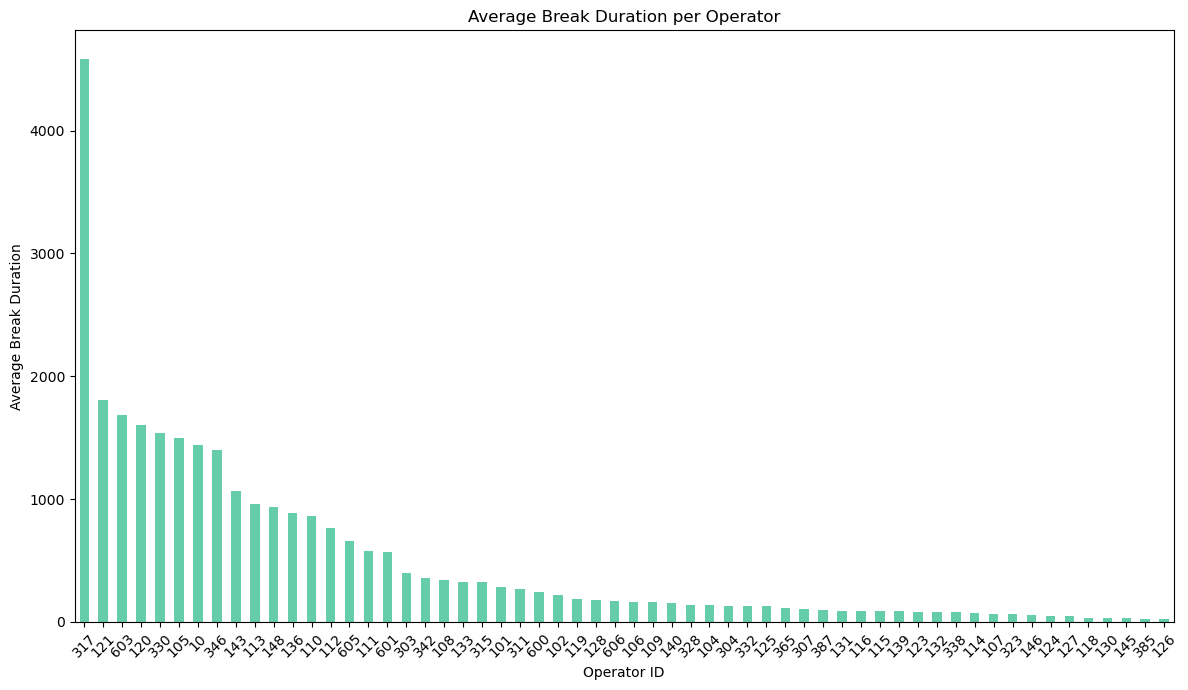

In [131]:
# Plotting
plt.figure(figsize=(12, 7))
df_cashier_breaktime_analysis.set_index('OperatorID')['AverageBreakDuration'].plot(kind='bar', color='mediumaquamarine')
plt.title('Average Break Duration per Operator')
plt.ylabel('Average Break Duration')
plt.xlabel('Operator ID')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
# Select Query to fetch transaction count and average value by hour from the data warehouse
hourly_transaction_analysis_query = """
SELECT 
    td.HourID,
    COUNT(DISTINCT tf.TransactionID) AS NumberOfTransactions,
    AVG(tf.TotalSales) AS AverageTransactionValue
FROM TransactionsFact tf
JOIN TimeDimension td ON tf.HourID = td.HourID
WHERE tf.TotalSales IS NOT NULL
GROUP BY td.HourID
ORDER BY NumberOfTransactions DESC;
"""

# Execute the query and fetch results
with connection.cursor() as cursor:
    cursor.execute(hourly_transaction_analysis_query)
    hourly_results = cursor.fetchall()
    
    hourly_columns = [desc[0] for desc in cursor.description]  # Get column names from the cursor description
    df_hourly_transaction_analysis = pd.DataFrame(hourly_results, columns=hourly_columns)


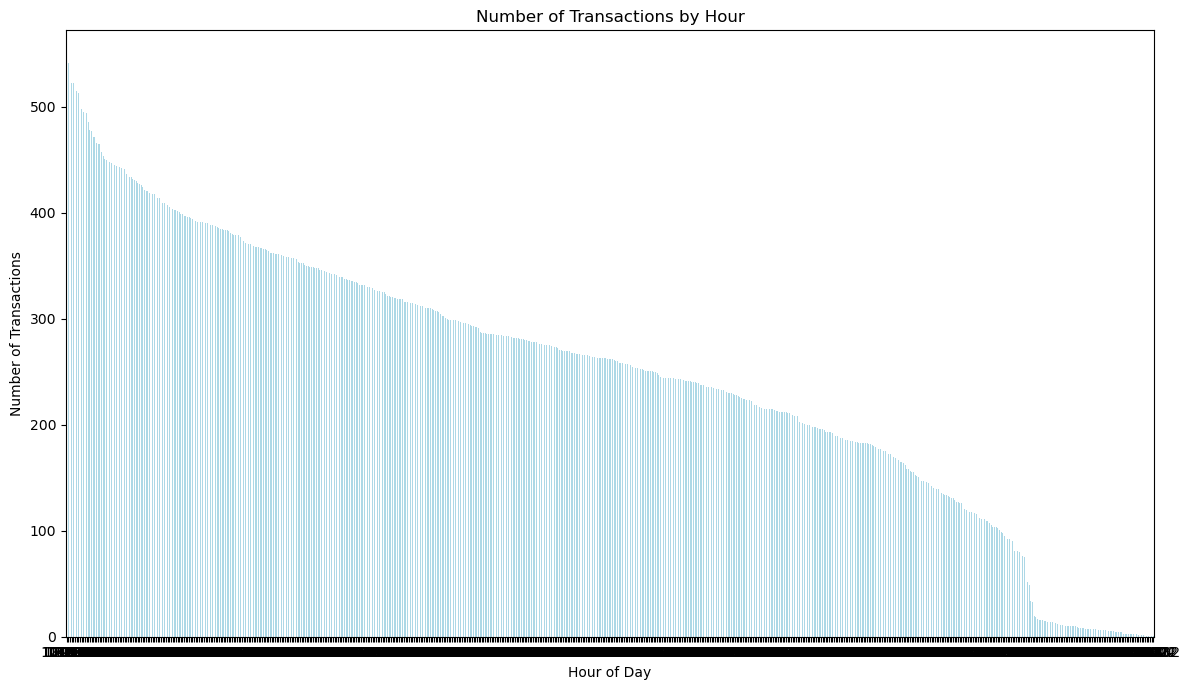

In [8]:
# Plotting the number of transactions by hour
plt.figure(figsize=(12, 7))
df_hourly_transaction_analysis.set_index('HourID')['NumberOfTransactions'].plot(kind='bar', color='lightblue')
plt.title('Number of Transactions by Hour')
plt.ylabel('Number of Transactions')
plt.xlabel('Hour of Day')
plt.xticks(rotation=0)  # No need to rotate if the HourID is just an hour number
plt.tight_layout()
plt.show()

In [14]:
# SQL query to retrieve total sales by hour across all Saturdays and Sundays in 2017
total_sales_weekends_query = """
SELECT 
    td.HourID,
    td.DayOfWeek,
    AVG(tf.TotalSales) AS AvgTotalSales
FROM TransactionsFact tf
JOIN TimeDimension td ON tf.HourID = td.HourID
WHERE YEAR(td.Date) = 2017 AND td.DayOfWeek IN ('Saturday', 'Sunday')
GROUP BY td.HourID, td.DayOfWeek
ORDER BY td.DayOfWeek, td.HourID;
"""

# Execute the query and fetch results
with connection.cursor() as cursor:
    cursor.execute(total_sales_weekends_query)
    total_sales_weekends_results = cursor.fetchall()
    
    # Extract column names from the cursor description
    total_sales_weekends_columns = [desc[0] for desc in cursor.description]
    # Create a DataFrame with the results
    df_total_sales_weekends = pd.DataFrame(total_sales_weekends_results, columns=total_sales_weekends_columns)


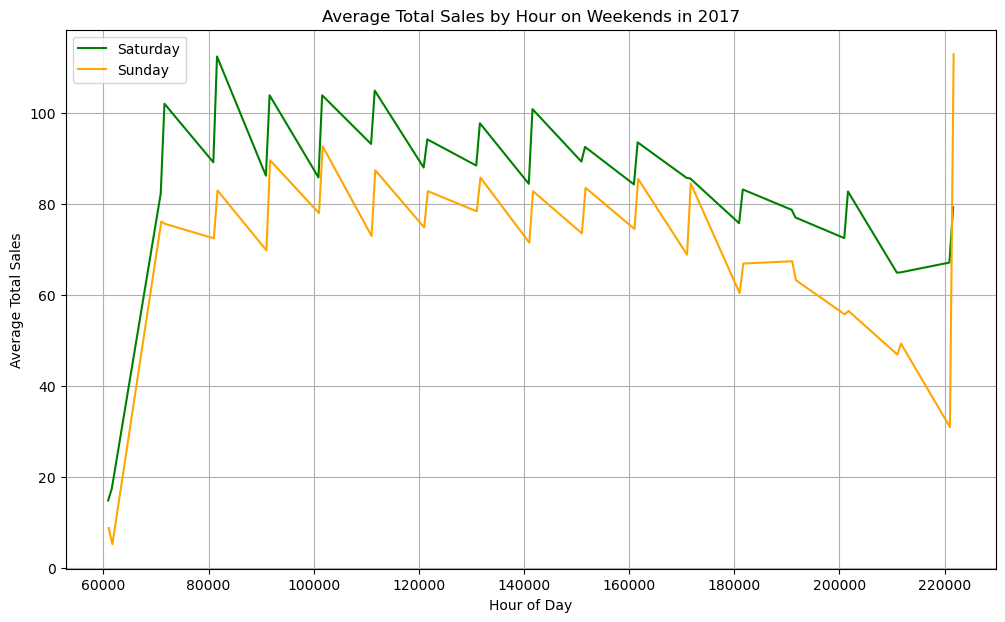

In [16]:
# Separate the data for Saturdays and Sundays
df_saturday_sales = df_total_sales_weekends[df_total_sales_weekends['DayOfWeek'] == 'Saturday']
df_sunday_sales = df_total_sales_weekends[df_total_sales_weekends['DayOfWeek'] == 'Sunday']

# Plotting the average total sales by hour for Saturdays and Sundays
plt.figure(figsize=(12, 7))
plt.plot(df_saturday_sales['HourID'], df_saturday_sales['AvgTotalSales'], label='Saturday', color='green')
plt.plot(df_sunday_sales['HourID'], df_sunday_sales['AvgTotalSales'], label='Sunday', color='orange')

plt.title('Average Total Sales by Hour on Weekends in 2017')
plt.ylabel('Average Total Sales')
plt.xlabel('Hour of Day')
plt.legend()
plt.grid(True)
plt.show()


In [24]:
# Query to get total break time for each cashier in 2017
break_time_query = """
SELECT 
    OperatorID,
    SUM(BreakDuration) AS TotalBreakTime
FROM TransactionsFact
JOIN TimeDimension ON TransactionsFact.HourID = TimeDimension.HourID
WHERE YEAR(TimeDimension.Date) = 2017
GROUP BY OperatorID;
"""

# Execute the query and store the results in a DataFrame
with connection.cursor() as cursor:
    cursor.execute(break_time_query)
    break_time_results = cursor.fetchall()
    df_break_time = pd.DataFrame(break_time_results, columns=['OperatorID', 'TotalBreakTime'])

# Display the DataFrame
df_break_time.head()


,OperatorID,TotalBreakTime
0,269,None
1,107,1835
2,113,1000
3,266,None
4,268,None


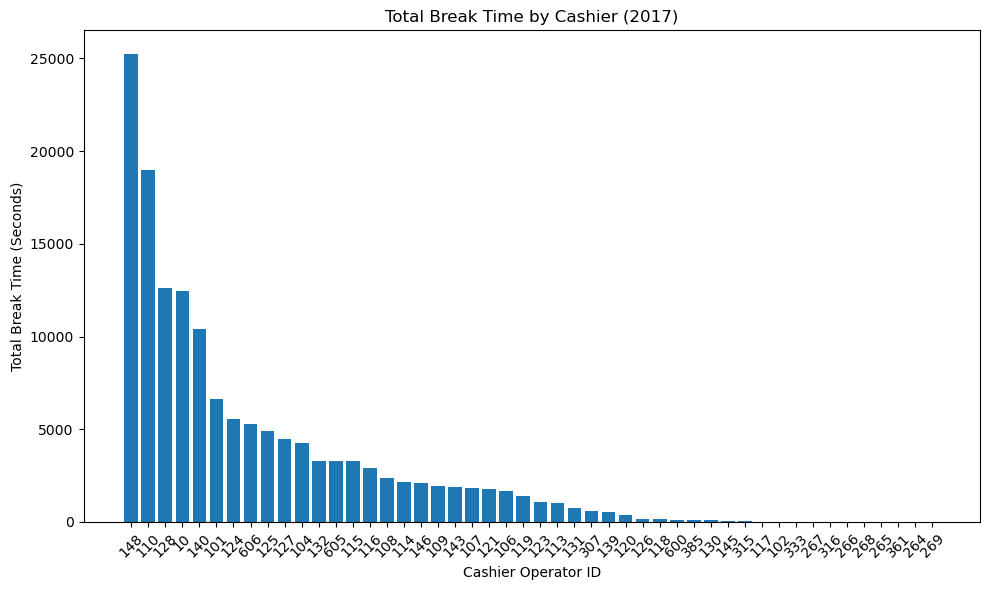

In [39]:
# First convert 'TotalBreakTime' to numeric to handle any non-numeric issues
df_break_time['TotalBreakTime'] = pd.to_numeric(df_break_time['TotalBreakTime'], errors='coerce')

# Now sort the DataFrame by 'TotalBreakTime' in descending order
df_break_time_sorted = df_break_time.sort_values(by='TotalBreakTime', ascending=False)

# Reset the index so that 'OperatorID' is a column again, for plotting purposes
df_break_time_sorted.reset_index(drop=True, inplace=True)

# Now plot the sorted DataFrame
plt.figure(figsize=(10, 6))
plt.bar(x=df_break_time_sorted.index, height=df_break_time_sorted['TotalBreakTime'])
plt.xticks(ticks=df_break_time_sorted.index, labels=df_break_time_sorted['OperatorID'], rotation=45)
plt.title('Total Break Time by Cashier (2017)')
plt.xlabel('Cashier Operator ID')
plt.ylabel('Total Break Time (Seconds)')
plt.tight_layout()
plt.show()

In [25]:
# Query to get total basket size handled by each cashier in 2017
basket_size_query = """
SELECT 
    OperatorID,
    SUM(TotalItemsProcessed) AS TotalBasketSize
FROM TransactionsFact
JOIN TimeDimension ON TransactionsFact.HourID = TimeDimension.HourID
WHERE YEAR(TimeDimension.Date) = 2017
GROUP BY OperatorID;
"""

# Execute the query and store the results in a DataFrame
with connection.cursor() as cursor:
    cursor.execute(basket_size_query)
    basket_size_results = cursor.fetchall()
    df_basket_size = pd.DataFrame(basket_size_results, columns=['OperatorID', 'TotalBasketSize'])

# Display the DataFrame
df_basket_size.head()


,OperatorID,TotalBasketSize
0,269,14000
1,107,11931
2,113,8384
3,266,29027
4,268,31382


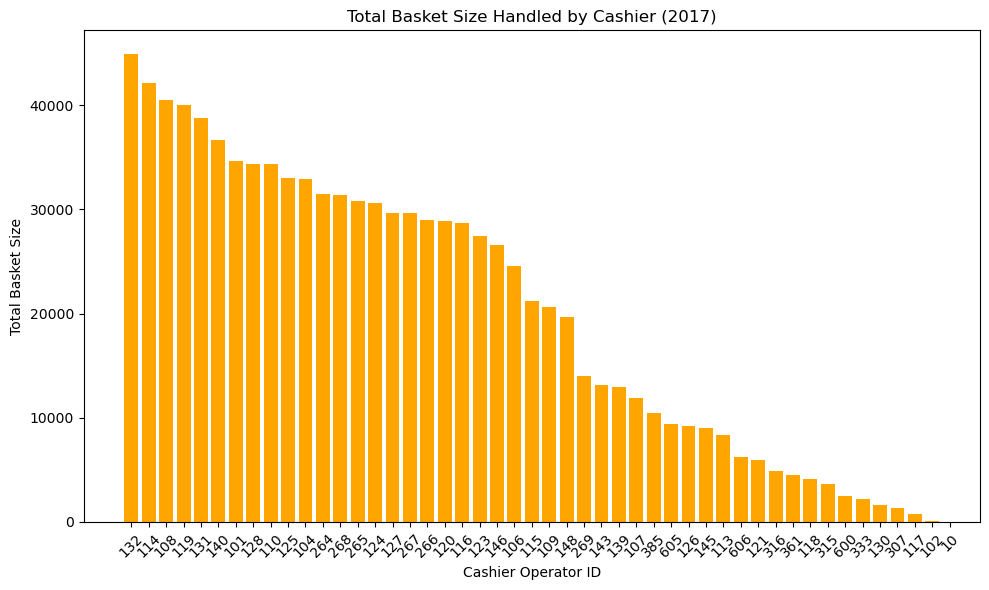

In [40]:
# Sort the DataFrame in descending order by total basket size
df_basket_size['TotalBasketSize'] = pd.to_numeric(df_basket_size['TotalBasketSize'], errors='coerce')
df_basket_size_sorted = df_basket_size.sort_values(by='TotalBasketSize', ascending=False)

# Reset the index so that 'OperatorID' is a column again, for plotting purposes
df_basket_size_sorted.reset_index(drop=True, inplace=True)

# Now plot the sorted DataFrame
plt.figure(figsize=(10, 6))
plt.bar(x=df_basket_size_sorted.index, height=df_basket_size_sorted['TotalBasketSize'], color='orange')
plt.xticks(ticks=df_basket_size_sorted.index, labels=df_basket_size_sorted['OperatorID'], rotation=45)
plt.title('Total Basket Size Handled by Cashier (2017)')
plt.xlabel('Cashier Operator ID')
plt.ylabel('Total Basket Size')
plt.tight_layout()
plt.show()

In [27]:
# Query to get average transaction time for each cashier in 2017
transaction_time_query = """
SELECT 
    OperatorID,
    AVG(TransactionTime) AS AvgTransactionTime
FROM TransactionsFact
JOIN TimeDimension ON TransactionsFact.HourID = TimeDimension.HourID
WHERE YEAR(TimeDimension.Date) = 2017
GROUP BY OperatorID;
"""

# Execute the query and store the results in a DataFrame
with connection.cursor() as cursor:
    cursor.execute(transaction_time_query)
    transaction_time_results = cursor.fetchall()
    df_transaction_time = pd.DataFrame(transaction_time_results, columns=['OperatorID', 'AvgTransactionTime'])

# Display the DataFrame
df_transaction_time.head()


,OperatorID,AvgTransactionTime
0,269,104.4919
1,107,52.6032
2,113,55.2964
3,266,106.5048
4,268,92.7564


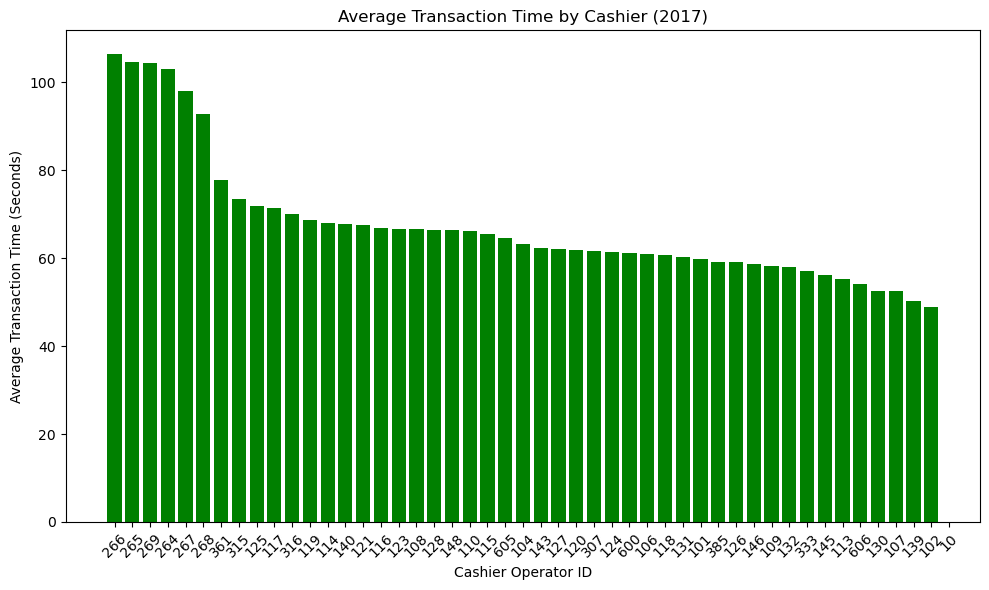

In [41]:
# Convert 'AvgTransactionTime' to numeric to handle any non-numeric issues
df_transaction_time['AvgTransactionTime'] = pd.to_numeric(df_transaction_time['AvgTransactionTime'], errors='coerce')

# Now sort the DataFrame by 'AvgTransactionTime' in descending order
df_transaction_time_sorted = df_transaction_time.sort_values(by='AvgTransactionTime', ascending=False)

# Reset the index so that 'OperatorID' is a column again, for plotting purposes
df_transaction_time_sorted.reset_index(drop=True, inplace=True)

# Now plot the sorted DataFrame
plt.figure(figsize=(10, 6))
plt.bar(x=df_transaction_time_sorted.index, height=df_transaction_time_sorted['AvgTransactionTime'], color='green')
plt.xticks(ticks=df_transaction_time_sorted.index, labels=df_transaction_time_sorted['OperatorID'], rotation=45)
plt.title('Average Transaction Time by Cashier (2017)')
plt.xlabel('Cashier Operator ID')
plt.ylabel('Average Transaction Time (Seconds)')
plt.tight_layout()
plt.show()

In [46]:
# SQL query
cash_card_transactions_query = """
SELECT 
    tf.OperatorID,
    SUM(CASE WHEN pmd.PaymentTypeName = 'Cash' THEN 1 ELSE 0 END) AS CashTransactions,
    SUM(CASE WHEN pmd.PaymentTypeName = 'Card' THEN 1 ELSE 0 END) AS CardTransactions
FROM 
    TransactionsFact tf
JOIN 
    TimeDimension td ON tf.HourID = td.HourID
JOIN 
    PaymentMethodDimension pmd ON tf.PaymentMethodID = pmd.PaymentMethodID
WHERE 
    YEAR(td.Date) = 2017
GROUP BY 
    tf.OperatorID;
"""

# Execute the query and store the results in a DataFrame
with connection.cursor() as cursor:
    cursor.execute(cash_card_transactions_query)
    results = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    df_cash_card_transactions = pd.DataFrame(results, columns=columns)

# Display the DataFrame
print(df_cash_card_transactions.head())

   OperatorID CashTransactions CardTransactions
0         107              466              274
1         605              322              247
2         110             1287              862
3         114             1345             1047
4         106              844              615


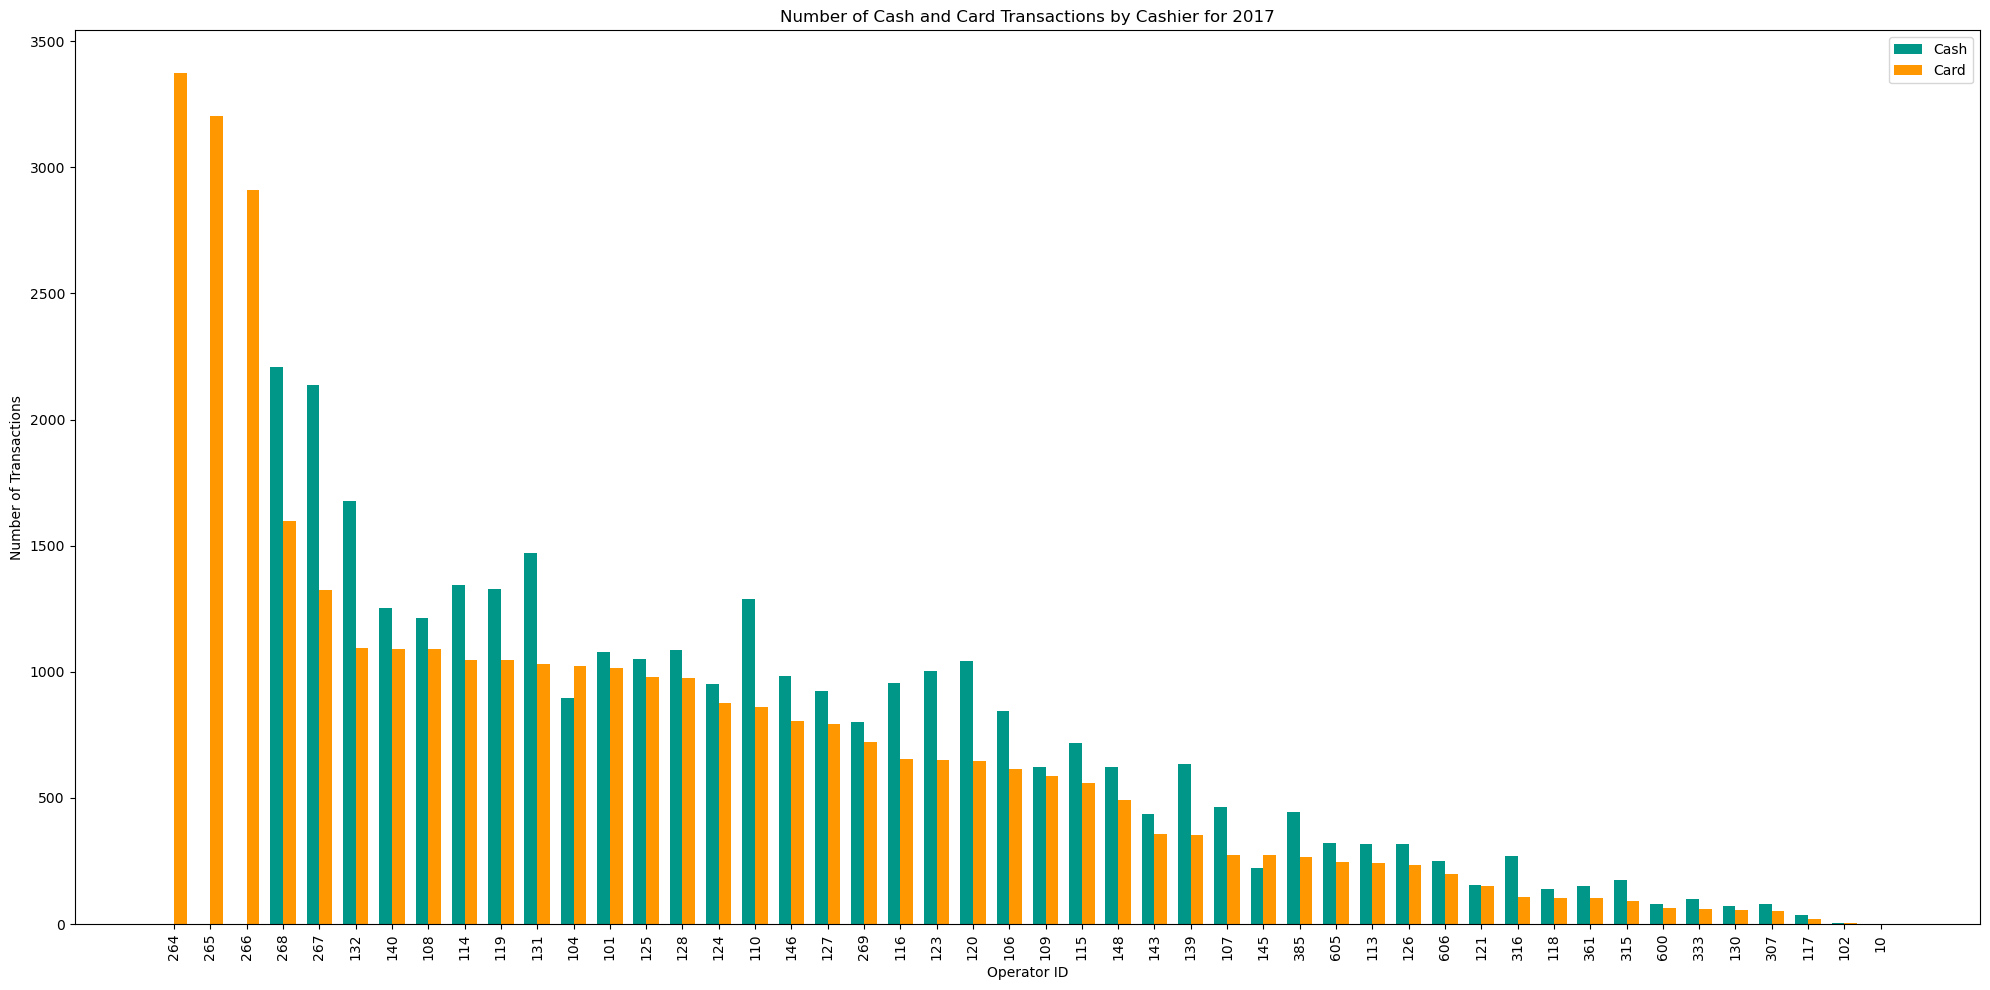

In [56]:
import numpy as np

df_cash_card_transactions_sorted = df_cash_card_transactions.sort_values('CardTransactions', ascending=False)

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars
index = np.arange(len(df_cash_card_transactions_sorted))

# Create the figure and the axes
fig, ax = plt.subplots(figsize=(20, 10))

# Choose a different color combination
colors = ['#009688', '#FF9800']  # Light red and light blue

# Plot cash transactions
cash_bars = ax.bar(index, df_cash_card_transactions_sorted['CashTransactions'], bar_width, label='Cash', color=colors[0])

# Plot card transactions with an offset of 'bar_width' to put it next to the cash bars
card_bars = ax.bar(index + bar_width, df_cash_card_transactions_sorted['CardTransactions'], bar_width, label='Card', color=colors[1])

# Add labels, title, and legend
ax.set_xlabel('Operator ID')
ax.set_ylabel('Number of Transactions')
ax.set_title('Number of Cash and Card Transactions by Cashier for 2017')
ax.set_xticks(index + bar_width / 2)  # Positioning the x-ticks in the middle of the grouped bars
ax.set_xticklabels(df_cash_card_transactions_sorted['OperatorID'])
ax.legend()

# Show the plot
plt.xticks(rotation=90)  # Rotate x-ticks if needed
plt.tight_layout()
plt.show()


In [57]:
connection.commit()

In [58]:
cursor.close()

False

In [59]:
connection.close()